# Supervised Learning
## Regression & Klassifikation

In [59]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_theme(context='talk', style='whitegrid')

In diesem Notebook lernen Sie die zuvor erlernten Grundlagen des Supervised Learnings anhand des mpg Datasets anzuwenden.<br>
Hierfür wird sowohl eine Regression, als auch eine Klassifikation mithilfe von neuronalen Netzen durchgeführt.<br>

Da die Business & Data Understanding Schritte eigentlich vorgelagert wären wird hier noch einmal auf ein paar Tools/Packages<br>
und hilfreiche Methoden für die Herangehensweise an solche ML-Probleme gegeben.

Weitere Informationen zu dem mpg-Datensatz sind hier zu finden: https://data.world/dataman-udit/cars-data

## Daten laden

In [60]:
df_mpg = sns.load_dataset("mpg")

Daten werden als pandas-Dataframe ausgegeben

In [61]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Pandas Dataframes kombinieren unterschiedliche Datentypen in einer Tabellenstruktur

In [62]:
df_mpg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### loc und iloc zum indexieren und filtern

**loc:** immer bei nicht-numerischen Spaltenbezeichnungen oder boolschen Ausdrücken

In [63]:
df_mpg.loc[df_mpg.horsepower > 200, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix


In [64]:
df_mpg.loc[df_mpg.horsepower > 200, ['origin','mpg']]

,origin,mpg
6,usa,14.0
7,usa,14.0
8,usa,14.0
13,usa,14.0
25,usa,10.0
27,usa,11.0
67,usa,11.0
94,usa,13.0
95,usa,12.0
116,usa,16.0


**iloc:** immer wenn nach numerischen Spalten gefiltert/indexiert werden soll

In [65]:
df_mpg.iloc[:5, :] #Ersten 5 Zeilen, Achtung:Letzter Index ist exklusiv!

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [66]:
df_mpg.iloc[:5,:-1] #Ersten 5 Zeilen und alle Spalten außer die letzte

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


### Visuelle Übersicht durch Pairplot

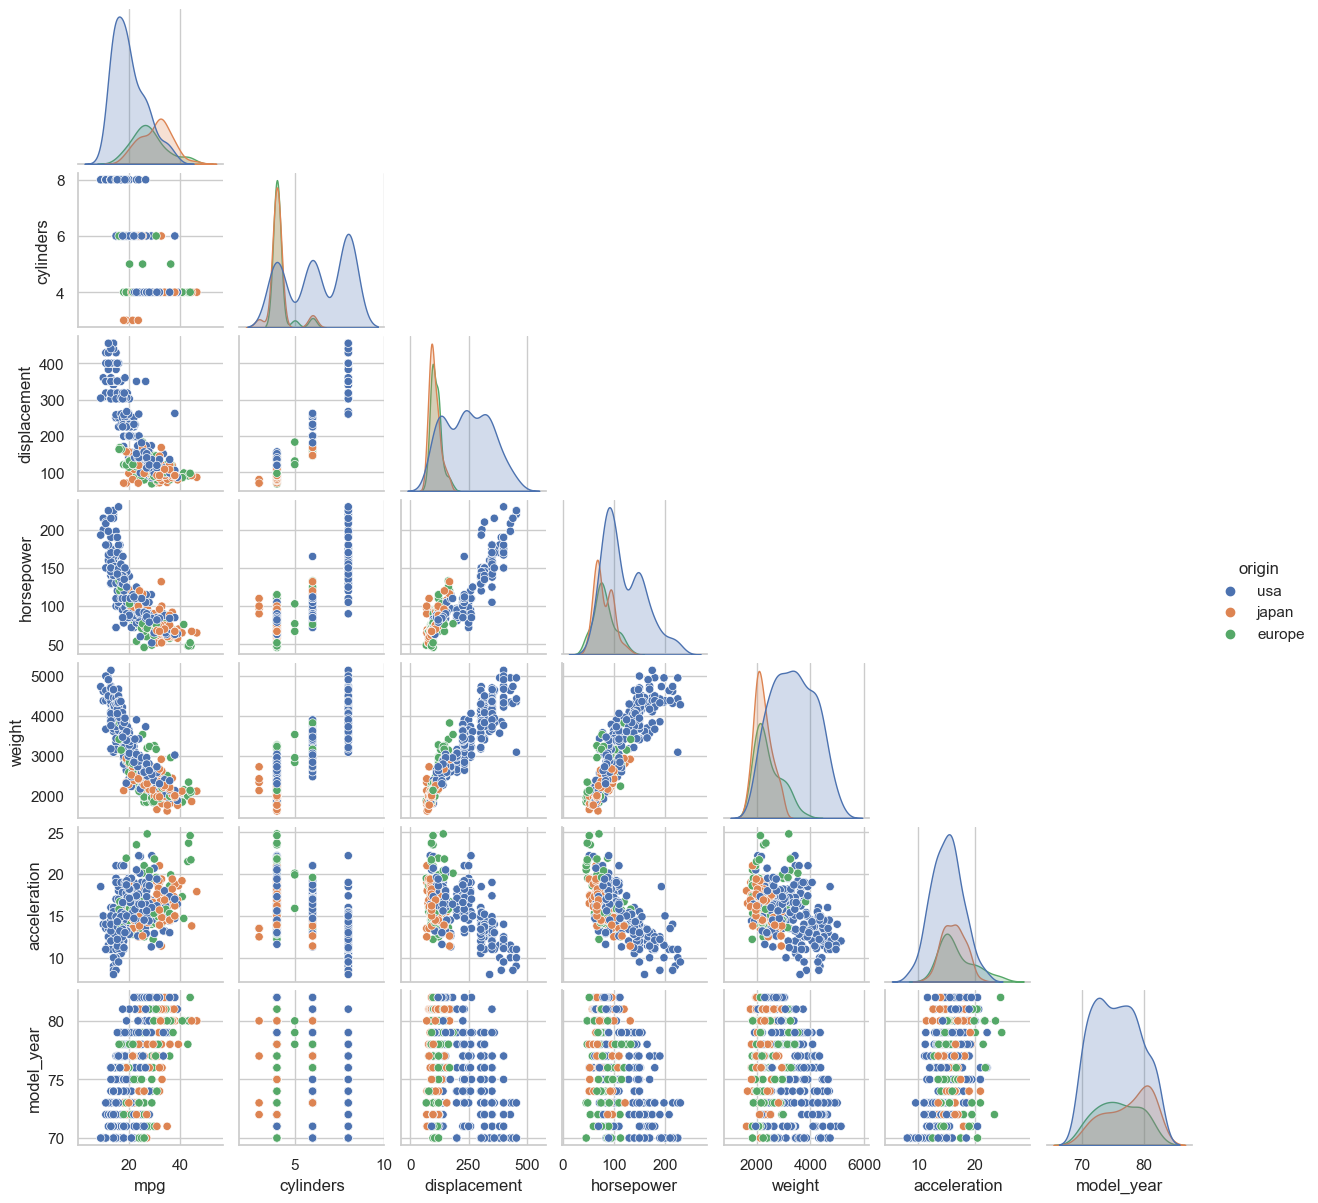

In [67]:
with sns.plotting_context("notebook"):
    sns.pairplot(df_mpg.iloc[:,:-1], hue="origin", corner=True, height=1.75)
    plt.show()

### Analyse der Fehlende Werte

In [68]:
df_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [69]:
df_mpg.loc[df_mpg.horsepower.isna()] # Alle Fehlwerte ausgeben

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### Ersatzwertbildung der fehlende Werte

Mögliche Methoden der Ersatzwertbildung
* Methode A: Deletion (nicht empfohlen)
* Methode B: Imputation
* Methode C: ML-Modell anhand vorhandener Features

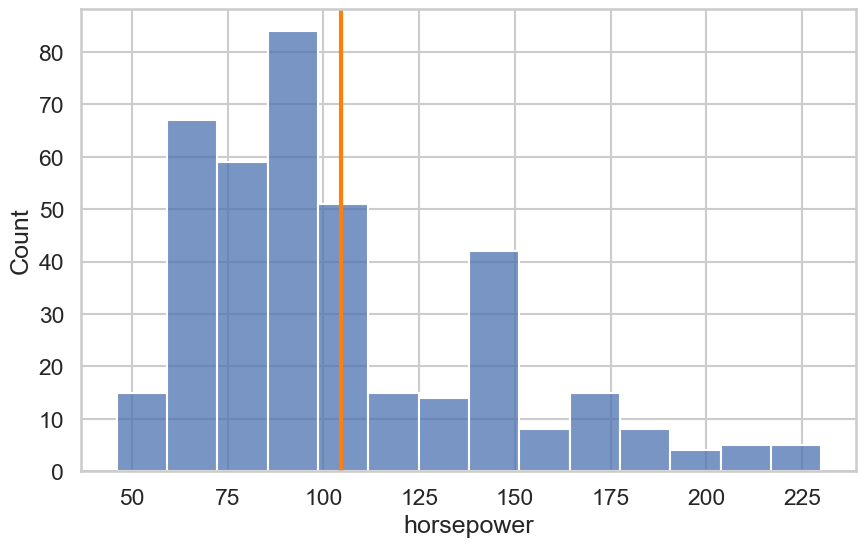

In [70]:
plt.figure(figsize=(10,6))

g = sns.histplot(data=df_mpg, x='horsepower')
g.axvline(x=df_mpg.horsepower.mean(), color="tab:orange", linewidth="3")

In [71]:
# df_mpg.loc[df_mpg.horsepower.isna(),'horsepower'] = df_mpg.horsepower.mean()

Die Verteilung der horsepower für Japan und Europa sind sehr ähnlich.<br>
Die der USA unterscheidet sich jedoch deutlich. Ein einheitlicher Mittelwert ist deshalb keine gute Idee.

<Axes: xlabel='horsepower', ylabel='origin'>

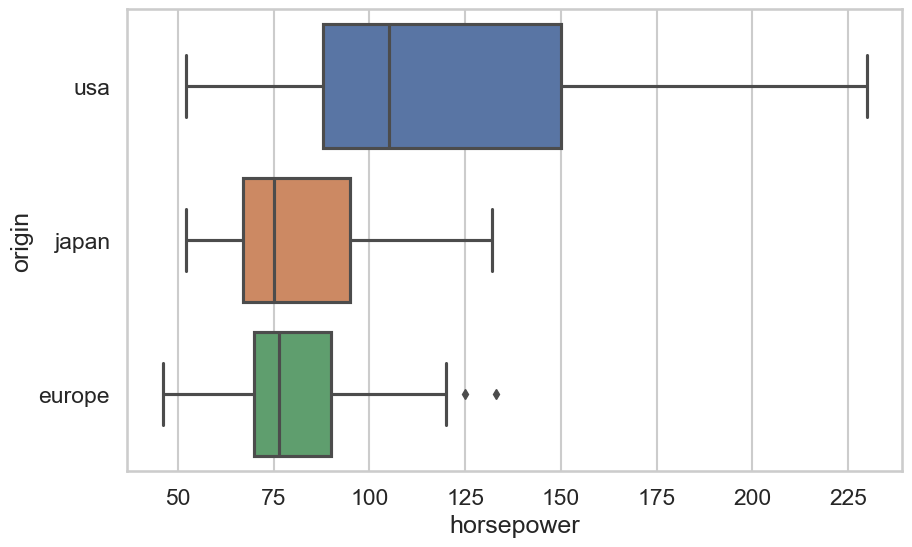

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_mpg, x='horsepower', y='origin') 

Imputation mit dem Mittelwert, gruppiert nach der Klasse -> bessere Methode, da Autos je nach Origin unterschiedliche horsepower haben

In [73]:
fill_values = df_mpg.groupby('origin')['horsepower'].transform('mean')
df_mpg.horsepower = df_mpg.horsepower.fillna(fill_values)

In [74]:
df_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Regression

Für dieses Regressionsmodell wollen wir die mpg (miles per gallon) vorhersagen, welches ein Fahrzeug fahren kann.

## Datenvorverarbeitung (Data preprocessing)

In [75]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [76]:
df_mpg.origin

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [77]:
df_mpg.origin = label_encoder.fit_transform(df_mpg.origin) ## Frage: Label Encoding vs. One-Hot Encoding

In [78]:
df_mpg.origin

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: origin, Length: 398, dtype: int32

### Z-Transformation / StandardSkalierung

In [79]:
df_mpg.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.50,2970.42,15.57,76.01,1.45
std,7.82,1.70,104.27,38.26,846.84,2.76,3.70,0.78
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,0.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,94.50,2803.50,15.50,76.00,2.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,2.00


In [80]:
df_mpg.loc[:,'cylinders':'acceleration'] = scaler.fit_transform(df_mpg.loc[:,'cylinders':'acceleration']) ## Mittelwert 0, Standardabweichung 1 (nicht immer genau möglich)

In [81]:
df_mpg.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,-0.00,-0.00,-0.00,-0.00,-0.00,76.01,1.45
std,7.82,1.00,1.00,1.00,1.00,1.00,3.70,0.78
min,9.00,-1.44,-1.20,-1.53,-1.60,-2.75,70.00,0.00
25%,17.50,-0.86,-0.86,-0.75,-0.88,-0.63,73.00,1.00
50%,23.00,-0.86,-0.43,-0.26,-0.20,-0.02,76.00,2.00
75%,29.00,1.50,0.66,0.54,0.75,0.58,79.00,2.00
max,46.60,1.50,2.51,3.28,2.57,3.35,82.00,2.00


Was ist mit model_year?

In [82]:
df_mpg.model_year

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

In [83]:
df_mpg.model_year = df_mpg.model_year.astype("str")

**One Hot Codierung**

Beachte: Beim Erstellen der Predictions müssen jetzt immer alle Spalten jeweils One-Hot Codiert oder StandardSkaliert sein.

In [84]:
df_mpg = pd.get_dummies(df_mpg.iloc[:,:-1])

In [85]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,18.0,1.498191,1.090604,0.667358,0.630870,-1.295498,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,1.498191,1.503514,1.583186,0.854333,-1.477038,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,1.498191,1.196232,1.190688,0.550470,-1.658577,2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,1.498191,1.061796,1.190688,0.546923,-1.295498,2,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1.498191,1.042591,0.929023,0.565841,-1.840117,2,1,0,0,0,0,0,0,0,0,0,0,0,0


### Train-Test split

In [86]:
X = df_mpg.drop(columns=['mpg'])
y = df_mpg.mpg

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Modelling

In [88]:
reg_model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation='linear')
])

Alternative Methode TensorFlow-Modelle zu erstellen:

In [89]:
# reg_model = keras.models.Sequential() 
# reg_model.add(keras.layers.Flatten(input_shape=[X_train.shape[1]])) 
# reg_model.add(keras.layers.Dense(10, activation='relu')) # Hidden Layer mit 10 Neurons, benutzt Relu als activation function
# reg_model.add(keras.layers.Dense(10, activation='relu')) # zweite dense hidden layer
# reg_model.add(keras.layers.Dense(1, activation='linear')) # 1 Output Neuron für einen Ausgabewert

In [90]:
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                200       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [91]:
reg_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-4), ## SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(),               ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(),           ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [92]:
BATCHSIZE_REG = 32
EPOCHS_REG = 30

In [93]:
history = reg_model.fit(
    x=X_train, y=y_train,
    batch_size=BATCHSIZE_REG,
    epochs=EPOCHS_REG,
    validation_split=0.2
)

Epoch 1/30
8/8 [==============================] - 0s 14ms/step - loss: 647.0754 - mean_absolute_error: 24.1916 - val_loss: 590.7332 - val_mean_absolute_error: 22.9868
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 624.8557 - mean_absolute_error: 23.7443 - val_loss: 575.1863 - val_mean_absolute_error: 22.6483
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 610.5129 - mean_absolute_error: 23.4393 - val_loss: 561.8640 - val_mean_absolute_error: 22.3620
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 595.8041 - mean_absolute_error: 23.1422 - val_loss: 546.1208 - val_mean_absolute_error: 22.0258
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 577.0000 - mean_absolute_error: 22.7399 - val_loss: 523.3520 - val_mean_absolute_error: 21.5335
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 547.5378 - mean_absolute_error: 22.0960 - val_loss: 484.1296 - val_mean_absolute_error: 20.6569
Epo

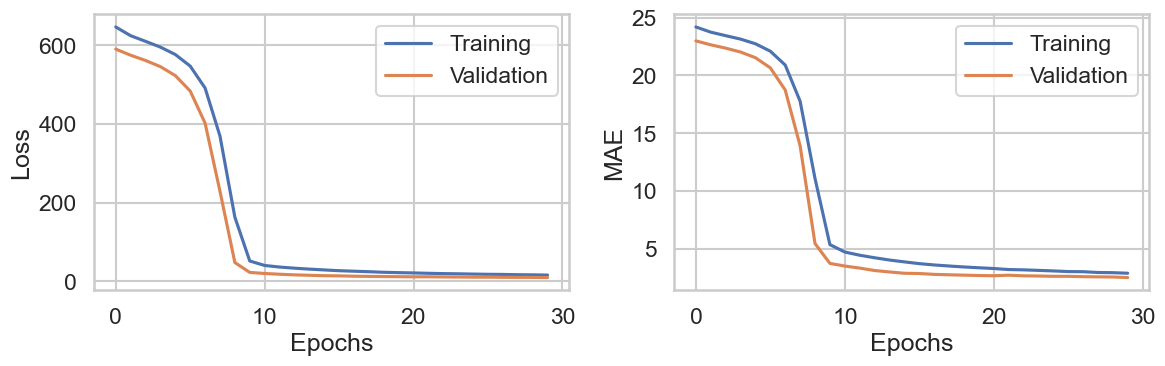

In [94]:
f, axes = plt.subplots(1,2, figsize=(12,4))

ax = axes[0]
sns.lineplot(x=range(EPOCHS_REG), y=history.history['loss'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_REG), y=history.history['val_loss'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")


ax = axes[1]
sns.lineplot(x=range(EPOCHS_REG), y=history.history['mean_absolute_error'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_REG), y=history.history['val_mean_absolute_error'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")

f.tight_layout()
plt.show()

## Vorhersage (Prediction)

In [95]:
X_test.iloc[:5]

,cylinders,displacement,horsepower,weight,acceleration,origin,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
304,-0.856321,-0.983552,-0.928801,-0.993671,-0.315185,0,0,0,0,0,0,0,0,0,0,1,0,0,0
133,0.320935,0.543257,-0.117639,0.958379,0.519896,2,0,0,0,0,1,0,0,0,0,0,0,0,0
7,1.498191,2.367746,2.891513,1.586204,-2.566274,2,1,0,0,0,0,0,0,0,0,0,0,0,0
388,-0.856321,-0.359385,-0.326971,-0.455705,-0.387801,2,0,0,0,0,0,0,0,0,0,0,0,0,1
159,1.498191,1.513117,1.138355,1.994113,-0.750880,2,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
y_test_subsample = y_test.iloc[:5].to_numpy()

y_test_subsample

array([37.3, 16. , 14. , 26. , 14. ])

In [97]:
y_pred_subsample = reg_model.predict(X_test.iloc[:5]).flatten()

y_pred_subsample

array([29.487701 , 14.234084 , 15.9419985, 26.366665 , 14.751704 ],
      dtype=float32)

In [98]:
y_test_subsample - y_pred_subsample

array([ 7.81229858,  1.76591587, -1.94199848, -0.36666489, -0.75170422])

In [99]:
np.abs(y_test_subsample - y_pred_subsample)

array([7.81229858, 1.76591587, 1.94199848, 0.36666489, 0.75170422])

In [100]:
np.mean(np.abs(y_test_subsample - y_pred_subsample))

2.5277164077758782

## Evaluierung

<img src="../Bilder/mean_average_error.png" alt="Mean Average Error" height="100"/>

In [101]:
loss_regression, mae = reg_model.evaluate(X_test,y_test)

print(f'Loss: {loss_regression:.4} | Mean Absolute Error: {mae:.5}')

3/3 [==============================] - 0s 2ms/step - loss: 18.1496 - mean_absolute_error: 3.0298
Loss: 18.15 | Mean Absolute Error: 3.0298


In [102]:
print(f'Durchschnittliche Abweichung von ca.: {mae:.5}')

Durchschnittliche Abweichung von ca.: 3.0298


Frage: Löst dies das Business Problem?

# Klassifikation

Nachdem wir die Regression betrachtet haben gehen wir nun über zur Klassifikation.<br>
Im Gegensatz zur Klassifikation versuchen wir bei der Klassifikation kategorische Werte vorherzusagen, statt numerischen.

Für dieses Beispiel verwenden wir als target "origin".

In [103]:
df_mpg = sns.load_dataset("mpg")

df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Grundsätzlich gleiches Vorgehen für Pre-Processing 

In [104]:
fill_values = df_mpg.groupby('origin')['horsepower'].transform('mean')
df_mpg.horsepower = df_mpg.horsepower.fillna(fill_values)

label_encoder = LabelEncoder()
scaler = StandardScaler()

# Label Encoding von origin
df_mpg.origin = label_encoder.fit_transform(df_mpg.origin)

# Standard Skalierung von numerischen Werten
df_mpg.loc[:,'cylinders':'acceleration'] = scaler.fit_transform(df_mpg.loc[:,'cylinders':'acceleration'])

# One Hot Codierung von model_year
df_mpg.model_year = df_mpg.model_year.astype("str")
df_mpg = pd.get_dummies(df_mpg.iloc[:,:-1])

In [105]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,18.0,1.498191,1.090604,0.667358,0.630870,-1.295498,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,1.498191,1.503514,1.583186,0.854333,-1.477038,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,1.498191,1.196232,1.190688,0.550470,-1.658577,2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,1.498191,1.061796,1.190688,0.546923,-1.295498,2,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1.498191,1.042591,0.929023,0.565841,-1.840117,2,1,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
X = df_mpg.drop(columns=['origin'])
y = df_mpg.origin

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Modelling

In [108]:
pd.unique(y)

array([2, 1, 0])

In [109]:
clf_model = keras.models.Sequential()
clf_model.add(keras.layers.Input(shape=(X_train.shape[1],)))
clf_model.add(keras.layers.Dense(20, activation='relu'))
clf_model.add(keras.layers.Dense(20, activation='relu'))
clf_model.add(keras.layers.Dense(3, activation='softmax')) # 3 Output Neuronen, 1 für jede Klasse, softmax activation da Klassen exklusiv sind

In [110]:
clf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                400       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 3)                 63        
                                                                 
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________


In [111]:
clf_model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"])

In [112]:
BATCHSIZE_CLF = 32
EPOCHS_CLF = 30

In [113]:
history = clf_model.fit(X_train, y_train, batch_size=BATCHSIZE_CLF, epochs=EPOCHS_CLF, validation_split = 0.2)

Epoch 1/30
8/8 [==============================] - 0s 38ms/step - loss: 1.3793 - accuracy: 0.4567 - val_loss: 1.1095 - val_accuracy: 0.6406
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 1.2263 - accuracy: 0.4921 - val_loss: 0.8373 - val_accuracy: 0.6406
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8755 - accuracy: 0.6063 - val_loss: 0.9650 - val_accuracy: 0.6094
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.9657 - accuracy: 0.5512 - val_loss: 0.8950 - val_accuracy: 0.6406
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8743 - accuracy: 0.6063 - val_loss: 0.7498 - val_accuracy: 0.7344
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8264 - accuracy: 0.6378 - val_loss: 0.7428 - val_accuracy: 0.6406
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8973 - accuracy: 0.6102 - val_loss: 0.8058 - val_accuracy: 0.7031
Epoch 8/30
8/8 [=================

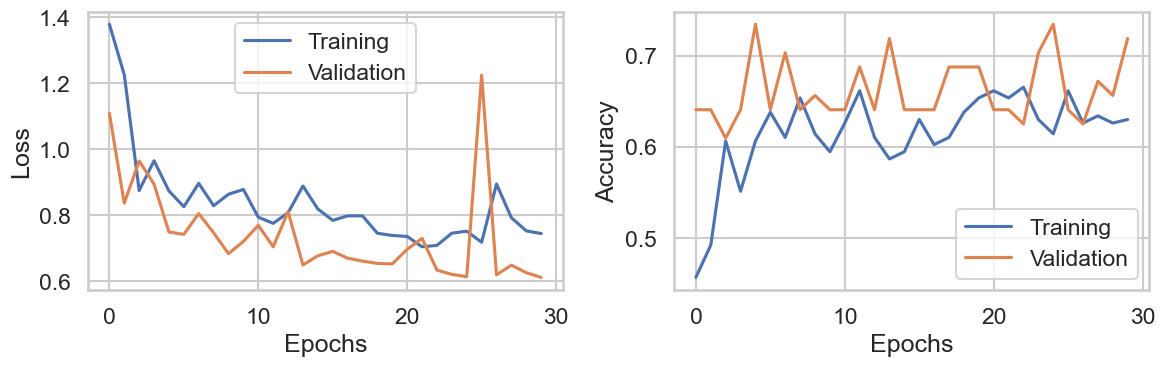

In [114]:
f, axes = plt.subplots(1,2, figsize=(12,4))

ax = axes[0]
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['loss'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['val_loss'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")


ax = axes[1]
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['accuracy'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['val_accuracy'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

f.tight_layout()
plt.show()

## Evaluation

In [115]:
loss_clf, acc = clf_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.6500


#### Warum schlechte Accuracy? 
- Unzureichende Trainingsdaten
- Explorative Datenanalyse fehlt
- Informative Features?
- Irrelevante Features entfernen